# TP 3

## Importaciones generales y cargo de csv's

In [1]:
# importacion general de librerias y de visualizacion (matplotlib y seaborn)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

plt.style.use('default') # haciendo los graficos un poco mas bonitos en matplotlib
#plt.rcParams['figure.figsize'] = (20, 10)

sns.set(style="whitegrid") # seteando tipo de grid en seaborn

pd.options.display.float_format = '{:20,.2f}'.format # suprimimos la notacion cientifica en los outputs

import warnings
warnings.filterwarnings('ignore')

from datetime import datetime
import numpy as np
import time

In [2]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials # Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

## Importación y merge

In [3]:
id = '1eN14-f3gbOCqoxkamVbH9RrZCIrmA6qG'
file_name = "train_identity.csv"
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile(file_name)

df_train_identity = pd.read_csv(file_name)

In [4]:
id = '1oHr_x71U0_5TG5Hsmbb5F7nyqdAZoZIN'
file_name = "train_transaction.csv"
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile(file_name)

df_train_transaction = pd.read_csv(file_name)

In [5]:
id = '16X0onJVcF0UPzT2hOkVLXCfqXGDh342_'
file_name = "test_identity.csv"
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile(file_name)

df_test_identity = pd.read_csv(file_name)

In [6]:
id = '1gLlf0Iz5YzOdBtXZrkQtHFxxyb_Azwd5'
file_name = "test_transaction.csv"
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile(file_name)

df_test_transaction = pd.read_csv(file_name)

### Reviso el df_train_transaction

In [7]:
df_train_transaction

TransactionID  isFraud  ...                 V338                 V339
0             2987000        0  ...                  nan                  nan
1             2987001        0  ...                  nan                  nan
2             2987002        0  ...                  nan                  nan
3             2987003        0  ...                  nan                  nan
4             2987004        0  ...                 0.00                 0.00
...               ...      ...  ...                  ...                  ...
590535        3577535        0  ...                  nan                  nan
590536        3577536        0  ...                  nan                  nan
590537        3577537        0  ...                  nan                  nan
590538        3577538        0  ...                  nan                  nan
590539        3577539        0  ...                  nan                  nan

[590540 rows x 394 columns]

In [8]:
df_train_transaction.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590540 entries, 0 to 590539
Data columns (total 394 columns):
 #   Column          Dtype  
---  ------          -----  
 0   TransactionID   int64  
 1   isFraud         int64  
 2   TransactionDT   int64  
 3   TransactionAmt  float64
 4   ProductCD       object 
 5   card1           int64  
 6   card2           float64
 7   card3           float64
 8   card4           object 
 9   card5           float64
 10  card6           object 
 11  addr1           float64
 12  addr2           float64
 13  dist1           float64
 14  dist2           float64
 15  P_emaildomain   object 
 16  R_emaildomain   object 
 17  C1              float64
 18  C2              float64
 19  C3              float64
 20  C4              float64
 21  C5              float64
 22  C6              float64
 23  C7              float64
 24  C8              float64
 25  C9              float64
 26  C10             float64
 27  C11             float64
 28  C12          

In [9]:
for col, values in df_train_transaction.iteritems():
    num_uniques = values.nunique()
    print ('{name}: {num_unique}'.format(name=col, num_unique=num_uniques))
    print (values.unique())
    print ('\n')

TransactionID: 590540
[2987000 2987001 2987002 ... 3577537 3577538 3577539]


isFraud: 2
[0 1]


TransactionDT: 573349
[   86400    86401    86469 ... 15811079 15811088 15811131]


TransactionAmt: 20902
[  68.5    29.     59.   ...  557.54 1659.95  400.78]


ProductCD: 5
['W' 'H' 'C' 'S' 'R']


card1: 13553
[13926  2755  4663 ... 13166  8767 18038]


card2: 500
[ nan 404. 490. 567. 514. 555. 360. 100. 111. 352. 375. 418. 303. 314.
 543. 583. 148. 321. 269. 361. 272. 399. 569. 453. 417. 512. 545. 266.
 114. 481. 452. 547. 383. 170. 343. 556. 285. 562. 302. 264. 558. 500.
 396. 103. 206. 143. 243. 476. 199. 174. 423. 446. 492. 523. 440. 528.
 161. 535. 354. 117. 455. 325. 158. 268. 122. 479. 147. 215. 480. 265.
 388. 408. 309. 415. 414. 437. 104. 225. 101. 134. 586. 191. 491. 369.
 322. 494. 532. 313. 474. 324. 475. 298. 429. 432. 553. 566. 599. 296.
 251. 310. 242. 204. 250. 270. 346. 316. 194. 587. 390. 135. 536. 254.
 226. 327. 420. 260. 413. 428. 561. 387. 411. 392. 203. 297. 136. 27

In [10]:
for i in df_train_transaction.columns: 
    promedio = 100*df_train_transaction[i].isnull().sum()/len(df_train_transaction[i])
    print("La columna " + i + " tiene " + str(promedio) + " % de elementos nulos")

La columna TransactionID tiene 0.0 % de elementos nulos
La columna isFraud tiene 0.0 % de elementos nulos
La columna TransactionDT tiene 0.0 % de elementos nulos
La columna TransactionAmt tiene 0.0 % de elementos nulos
La columna ProductCD tiene 0.0 % de elementos nulos
La columna card1 tiene 0.0 % de elementos nulos
La columna card2 tiene 1.5126833068039423 % de elementos nulos
La columna card3 tiene 0.26501168422122123 % de elementos nulos
La columna card4 tiene 0.267043722694483 % de elementos nulos
La columna card5 tiene 0.7212043214684865 % de elementos nulos
La columna card6 tiene 0.26602770345785215 % de elementos nulos
La columna addr1 tiene 11.12642666034477 % de elementos nulos
La columna addr2 tiene 11.12642666034477 % de elementos nulos
La columna dist1 tiene 59.6523520845328 % de elementos nulos
La columna dist2 tiene 93.62837403054831 % de elementos nulos
La columna P_emaildomain tiene 15.99485216920107 % de elementos nulos
La columna R_emaildomain tiene 76.75161716395164

### Reviso el df_train_identity

In [11]:
df_train_identity

TransactionID  ...                          DeviceInfo
0             2987004  ...       SAMSUNG SM-G892A Build/NRD90M
1             2987008  ...                          iOS Device
2             2987010  ...                             Windows
3             2987011  ...                                 NaN
4             2987016  ...                               MacOS
...               ...  ...                                 ...
144228        3577521  ...             F3111 Build/33.3.A.1.97
144229        3577526  ...                 A574BL Build/NMF26F
144230        3577529  ...  Moto E (4) Plus Build/NMA26.42-152
144231        3577531  ...                               MacOS
144232        3577534  ...         RNE-L03 Build/HUAWEIRNE-L03

[144233 rows x 41 columns]

In [12]:
df_train_identity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144233 entries, 0 to 144232
Data columns (total 41 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   TransactionID  144233 non-null  int64  
 1   id_01          144233 non-null  float64
 2   id_02          140872 non-null  float64
 3   id_03          66324 non-null   float64
 4   id_04          66324 non-null   float64
 5   id_05          136865 non-null  float64
 6   id_06          136865 non-null  float64
 7   id_07          5155 non-null    float64
 8   id_08          5155 non-null    float64
 9   id_09          74926 non-null   float64
 10  id_10          74926 non-null   float64
 11  id_11          140978 non-null  float64
 12  id_12          144233 non-null  object 
 13  id_13          127320 non-null  float64
 14  id_14          80044 non-null   float64
 15  id_15          140985 non-null  object 
 16  id_16          129340 non-null  object 
 17  id_17          139369 non-nul

In [13]:
for col, values in df_train_identity.iteritems():
    num_uniques = values.nunique()
    print ('{name}: {num_unique}'.format(name=col, num_unique=num_uniques))
    print (values.unique())
    print ('\n')

TransactionID: 144233
[2987004 2987008 2987010 ... 3577529 3577531 3577534]


id_01: 77
[   0.   -5.  -15.  -10.  -20.  -40.  -30.  -25.  -55.  -45.  -70.  -90.
 -100.  -65.  -60.  -75.  -72.  -50.  -21.  -35.  -85.  -64.  -80.  -95.
  -87.  -58.   -7.  -12.  -11.   -9.  -27.  -42.   -6.  -62.  -18.  -76.
  -23.  -19.  -99.  -13.  -26.  -31.  -17.  -22.  -14.  -34.  -54.  -53.
  -28.  -88.  -16.  -61.  -46.  -94.  -24.  -93.  -44.  -89.  -92.  -37.
  -96.  -57.  -29.  -33.  -32.   -8.  -52.  -43.  -38.  -86.  -47.  -82.
  -48.  -63.  -71.  -56.  -51.]


id_02: 115655
[ 70787.  98945. 191631. ... 172059. 632381.  55528.]


id_03: 24
[ nan   0.   3.   2.   5.   1.   6.   9.   4.  -5.  -9.  -2.  -4.  -1.
  -3.  -7.  -6. -11.   7.  -8.  10. -10.   8. -12. -13.]


id_04: 15
[ nan   0. -11.  -5.  -8.  -1.  -6.  -9.  -3. -13.  -4. -10.  -7. -12.
  -2. -28.]


id_05: 93
[ nan   0.   1.   3.   2.   9.  12.   6.   4.  21.   7.   5.  18.  17.
  -1.  11.   8.  10. -10.  -8.  40.  13.  19.  -3.  14

In [14]:
for i in df_train_identity.columns: 
    promedio = 100*df_train_identity[i].isnull().sum()/len(df_train_identity[i])
    print("La columna " + i + " tiene " + str(promedio) + " % de elementos nulos")

La columna TransactionID tiene 0.0 % de elementos nulos
La columna id_01 tiene 0.0 % de elementos nulos
La columna id_02 tiene 2.33025729202055 % de elementos nulos
La columna id_03 tiene 54.016071218098496 % de elementos nulos
La columna id_04 tiene 54.016071218098496 % de elementos nulos
La columna id_05 tiene 5.108400990064687 % de elementos nulos
La columna id_06 tiene 5.108400990064687 % de elementos nulos
La columna id_07 tiene 96.42592194574057 % de elementos nulos
La columna id_08 tiene 96.42592194574057 % de elementos nulos
La columna id_09 tiene 48.05211012736336 % de elementos nulos
La columna id_10 tiene 48.05211012736336 % de elementos nulos
La columna id_11 tiene 2.256765095366525 % de elementos nulos
La columna id_12 tiene 0.0 % de elementos nulos
La columna id_13 tiene 11.726165301976662 % de elementos nulos
La columna id_14 tiene 44.50368500967185 % de elementos nulos
La columna id_15 tiene 2.2519118370969196 % de elementos nulos
La columna id_16 tiene 10.3256536298905

Se observa que las columnas: id_03, id_04, id_07 - id_10, id_14, id_18, id_21 - id_27, id_30, id_32 - id_34 tienen casi o más de la mitad de sus elementos nulos.

Las columnas que parecen mas interesantes son: id_01 e id_12 que casi no tienen elementos nulos

### Uno los df

In [15]:
df_identities_y_transactions = pd.merge(right = df_train_identity, left = df_train_transaction, left_on='TransactionID', right_on='TransactionID', how = 'outer')
df_identities_y_transactions

TransactionID  isFraud  ...  DeviceType                     DeviceInfo
0             2987000        0  ...         NaN                            NaN
1             2987001        0  ...         NaN                            NaN
2             2987002        0  ...         NaN                            NaN
3             2987003        0  ...         NaN                            NaN
4             2987004        0  ...      mobile  SAMSUNG SM-G892A Build/NRD90M
...               ...      ...  ...         ...                            ...
590535        3577535        0  ...         NaN                            NaN
590536        3577536        0  ...         NaN                            NaN
590537        3577537        0  ...         NaN                            NaN
590538        3577538        0  ...         NaN                            NaN
590539        3577539        0  ...         NaN                            NaN

[590540 rows x 434 columns]

In [16]:
df_train = df_identities_y_transactions
df_train.to_csv('df_train.csv')

## Encodings: one-hot, mean y countVectorizer

### Gráficos de correlación

In [17]:
df_train = df_identities_y_transactions
df_train

TransactionID  isFraud  ...  DeviceType                     DeviceInfo
0             2987000        0  ...         NaN                            NaN
1             2987001        0  ...         NaN                            NaN
2             2987002        0  ...         NaN                            NaN
3             2987003        0  ...         NaN                            NaN
4             2987004        0  ...      mobile  SAMSUNG SM-G892A Build/NRD90M
...               ...      ...  ...         ...                            ...
590535        3577535        0  ...         NaN                            NaN
590536        3577536        0  ...         NaN                            NaN
590537        3577537        0  ...         NaN                            NaN
590538        3577538        0  ...         NaN                            NaN
590539        3577539        0  ...         NaN                            NaN

[590540 rows x 434 columns]

In [18]:
# Correlacion negativa --> una variable decrece mientras la otra crece o viceversa
# Correlacion positiva --> una varibale crece mientras la otra tambien, o las dos decrecen.

#plt.figure(figsize=(10,100), dpi=85)
#plt.title("Correlacion de variables respecto a isFraud", weight='bold')
#df_train.corr()['isFraud'].drop('isFraud').sort_values(ascending=False).plot.barh()
#plt.ylabel('Feature', weight='bold')
#plt.xlabel("Nivel de correlacion", weight='bold')
#plt.show()

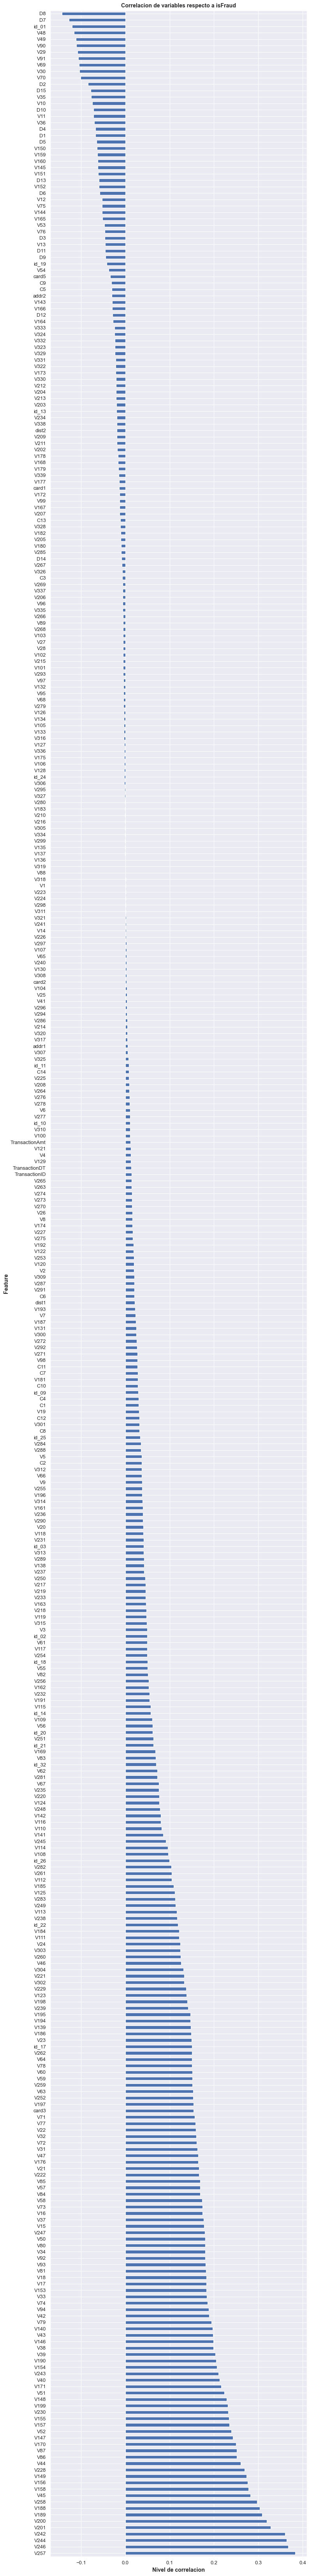

In [19]:
# Heatmap de correlaciones
#plt.figure(figsize=(10, 10), dpi=85)
#plt.title("Matriz de correlaciones", weight='bold')
#sns.heatmap(df_train.corr())
#plt.show()

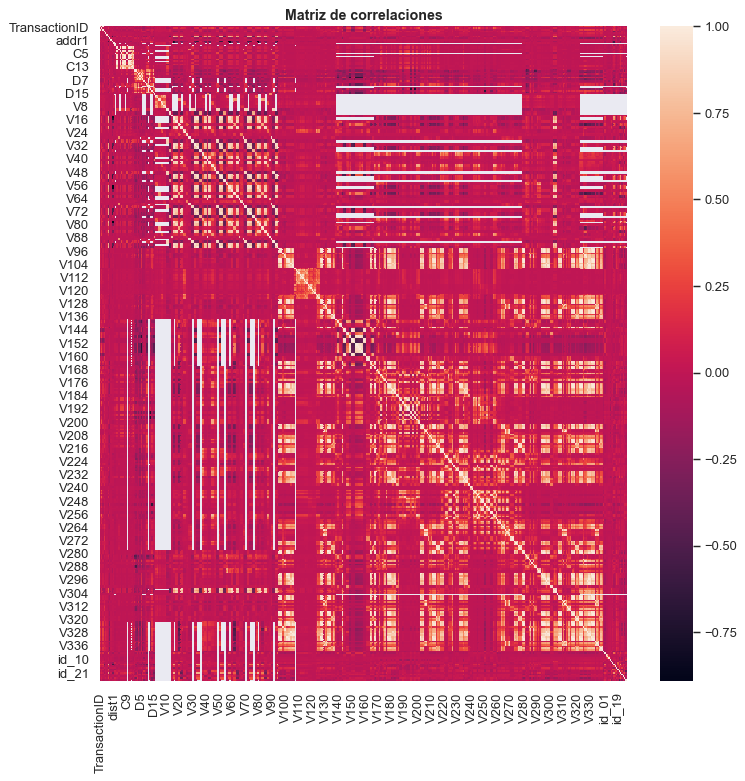

### Trabajo los csv de test

In [18]:
df_test_transaction

TransactionID  TransactionDT  ...                 V338                 V339
0             3663549       18403224  ...                  nan                  nan
1             3663550       18403263  ...                  nan                  nan
2             3663551       18403310  ...                  nan                  nan
3             3663552       18403310  ...                  nan                  nan
4             3663553       18403317  ...                  nan                  nan
...               ...            ...  ...                  ...                  ...
506686        4170235       34214279  ...                  nan                  nan
506687        4170236       34214287  ...                  nan                  nan
506688        4170237       34214326  ...                  nan                  nan
506689        4170238       34214337  ...                  nan                  nan
506690        4170239       34214345  ...                  nan                  nan

[506691 rows x 393 columns]

In [19]:
df_test_identity

TransactionID  ...                   DeviceInfo
0             3663586  ...  MYA-L13 Build/HUAWEIMYA-L13
1             3663588  ...         LGLS676 Build/MXB48T
2             3663597  ...                  Trident/7.0
3             3663601  ...  MYA-L13 Build/HUAWEIMYA-L13
4             3663602  ...         SM-G9650 Build/R16NW
...               ...  ...                          ...
141902        4170230  ...                     SM-J700M
141903        4170233  ...                     SM-J320M
141904        4170234  ...                   iOS Device
141905        4170236  ...  ALE-L23 Build/HuaweiALE-L23
141906        4170239  ...                      SAMSUNG

[141907 rows x 41 columns]

In [20]:
df_identities_y_transactions_test = pd.merge(right = df_test_identity, left = df_test_transaction, left_on='TransactionID', right_on='TransactionID', how = 'outer')
df_identities_y_transactions_test

TransactionID  TransactionDT  ...  DeviceType                   DeviceInfo
0             3663549       18403224  ...         NaN                          NaN
1             3663550       18403263  ...         NaN                          NaN
2             3663551       18403310  ...         NaN                          NaN
3             3663552       18403310  ...         NaN                          NaN
4             3663553       18403317  ...         NaN                          NaN
...               ...            ...  ...         ...                          ...
506686        4170235       34214279  ...         NaN                          NaN
506687        4170236       34214287  ...      mobile  ALE-L23 Build/HuaweiALE-L23
506688        4170237       34214326  ...         NaN                          NaN
506689        4170238       34214337  ...         NaN                          NaN
506690        4170239       34214345  ...      mobile                      SAMSUNG

[506691 rows x 433 columns]

In [21]:
df_test = df_identities_y_transactions_test
df_test.to_csv('df_test.csv')

### Reviso los nombres de los features para que coincidan train y test

In [22]:
df_train

TransactionID  isFraud  ...  DeviceType                     DeviceInfo
0             2987000        0  ...         NaN                            NaN
1             2987001        0  ...         NaN                            NaN
2             2987002        0  ...         NaN                            NaN
3             2987003        0  ...         NaN                            NaN
4             2987004        0  ...      mobile  SAMSUNG SM-G892A Build/NRD90M
...               ...      ...  ...         ...                            ...
590535        3577535        0  ...         NaN                            NaN
590536        3577536        0  ...         NaN                            NaN
590537        3577537        0  ...         NaN                            NaN
590538        3577538        0  ...         NaN                            NaN
590539        3577539        0  ...         NaN                            NaN

[590540 rows x 434 columns]

In [23]:
df_test

TransactionID  TransactionDT  ...  DeviceType                   DeviceInfo
0             3663549       18403224  ...         NaN                          NaN
1             3663550       18403263  ...         NaN                          NaN
2             3663551       18403310  ...         NaN                          NaN
3             3663552       18403310  ...         NaN                          NaN
4             3663553       18403317  ...         NaN                          NaN
...               ...            ...  ...         ...                          ...
506686        4170235       34214279  ...         NaN                          NaN
506687        4170236       34214287  ...      mobile  ALE-L23 Build/HuaweiALE-L23
506688        4170237       34214326  ...         NaN                          NaN
506689        4170238       34214337  ...         NaN                          NaN
506690        4170239       34214345  ...      mobile                      SAMSUNG

[506691 rows x 433 columns]

In [32]:
columnas_df_train = []

for col in df_train.columns:
    columnas_df_train.append(col)

columnas_df_train;

columnas_df_train.remove('isFraud')

In [33]:
columnas_df_test = []

for col in df_test.columns:
    columnas_df_test.append(col)

columnas_df_test;

In [35]:
len(columnas_df_test)

433

In [34]:
print("columnas_df_train    ,     columnas_df_test")
for i in range(len(columnas_df_test)):
  print(columnas_df_train[i],"    ,     ",columnas_df_test[i])


columnas_df_train    ,     columnas_df_test
TransactionID     ,      TransactionID
TransactionDT     ,      TransactionDT
TransactionAmt     ,      TransactionAmt
ProductCD     ,      ProductCD
card1     ,      card1
card2     ,      card2
card3     ,      card3
card4     ,      card4
card5     ,      card5
card6     ,      card6
addr1     ,      addr1
addr2     ,      addr2
dist1     ,      dist1
dist2     ,      dist2
P_emaildomain     ,      P_emaildomain
R_emaildomain     ,      R_emaildomain
C1     ,      C1
C2     ,      C2
C3     ,      C3
C4     ,      C4
C5     ,      C5
C6     ,      C6
C7     ,      C7
C8     ,      C8
C9     ,      C9
C10     ,      C10
C11     ,      C11
C12     ,      C12
C13     ,      C13
C14     ,      C14
D1     ,      D1
D2     ,      D2
D3     ,      D3
D4     ,      D4
D5     ,      D5
D6     ,      D6
D7     ,      D7
D8     ,      D8
D9     ,      D9
D10     ,      D10
D11     ,      D11
D12     ,      D12
D13     ,      D13
D14     ,      D14
D1

Los dos dataframes tienen las mismas columans pero en una estan con un "-" y en el otro con un "_", asi que renombro las columnas de test para que no halla problemas después.

In [39]:
columnas_a_renombrar = {}

for i in range(len(columnas_df_test)):
  columnas_a_renombrar[columnas_df_test[i]] = columnas_df_train[i]

columnas_a_renombrar

{'C1': 'C1',
 'C10': 'C10',
 'C11': 'C11',
 'C12': 'C12',
 'C13': 'C13',
 'C14': 'C14',
 'C2': 'C2',
 'C3': 'C3',
 'C4': 'C4',
 'C5': 'C5',
 'C6': 'C6',
 'C7': 'C7',
 'C8': 'C8',
 'C9': 'C9',
 'D1': 'D1',
 'D10': 'D10',
 'D11': 'D11',
 'D12': 'D12',
 'D13': 'D13',
 'D14': 'D14',
 'D15': 'D15',
 'D2': 'D2',
 'D3': 'D3',
 'D4': 'D4',
 'D5': 'D5',
 'D6': 'D6',
 'D7': 'D7',
 'D8': 'D8',
 'D9': 'D9',
 'DeviceInfo': 'DeviceInfo',
 'DeviceType': 'DeviceType',
 'M1': 'M1',
 'M2': 'M2',
 'M3': 'M3',
 'M4': 'M4',
 'M5': 'M5',
 'M6': 'M6',
 'M7': 'M7',
 'M8': 'M8',
 'M9': 'M9',
 'P_emaildomain': 'P_emaildomain',
 'ProductCD': 'ProductCD',
 'R_emaildomain': 'R_emaildomain',
 'TransactionAmt': 'TransactionAmt',
 'TransactionDT': 'TransactionDT',
 'TransactionID': 'TransactionID',
 'V1': 'V1',
 'V10': 'V10',
 'V100': 'V100',
 'V101': 'V101',
 'V102': 'V102',
 'V103': 'V103',
 'V104': 'V104',
 'V105': 'V105',
 'V106': 'V106',
 'V107': 'V107',
 'V108': 'V108',
 'V109': 'V109',
 'V11': 'V11',
 'V110': 

In [40]:
df_test.rename(columns=columnas_a_renombrar, inplace=True)

df_test

TransactionID  TransactionDT  ...  DeviceType                   DeviceInfo
0             3663549       18403224  ...         NaN                          NaN
1             3663550       18403263  ...         NaN                          NaN
2             3663551       18403310  ...         NaN                          NaN
3             3663552       18403310  ...         NaN                          NaN
4             3663553       18403317  ...         NaN                          NaN
...               ...            ...  ...         ...                          ...
506686        4170235       34214279  ...         NaN                          NaN
506687        4170236       34214287  ...      mobile  ALE-L23 Build/HuaweiALE-L23
506688        4170237       34214326  ...         NaN                          NaN
506689        4170238       34214337  ...         NaN                          NaN
506690        4170239       34214345  ...      mobile                      SAMSUNG

[506691 rows x 433 columns]

In [41]:
df_train

TransactionID  isFraud  ...  DeviceType                     DeviceInfo
0             2987000        0  ...         NaN                            NaN
1             2987001        0  ...         NaN                            NaN
2             2987002        0  ...         NaN                            NaN
3             2987003        0  ...         NaN                            NaN
4             2987004        0  ...      mobile  SAMSUNG SM-G892A Build/NRD90M
...               ...      ...  ...         ...                            ...
590535        3577535        0  ...         NaN                            NaN
590536        3577536        0  ...         NaN                            NaN
590537        3577537        0  ...         NaN                            NaN
590538        3577538        0  ...         NaN                            NaN
590539        3577539        0  ...         NaN                            NaN

[590540 rows x 434 columns]

In [42]:
df_train.to_csv('df_train.csv', index = False)
df_test.to_csv('df_test.csv', index = False)

### Feature engineering

In [3]:
df_train = pd.read_csv("df_train.csv")
df_test = pd.read_csv("df_test.csv")

In [4]:
df_test.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506691 entries, 0 to 506690
Data columns (total 433 columns):
 #   Column          Dtype  
---  ------          -----  
 0   TransactionID   int64  
 1   TransactionDT   int64  
 2   TransactionAmt  float64
 3   ProductCD       object 
 4   card1           int64  
 5   card2           float64
 6   card3           float64
 7   card4           object 
 8   card5           float64
 9   card6           object 
 10  addr1           float64
 11  addr2           float64
 12  dist1           float64
 13  dist2           float64
 14  P_emaildomain   object 
 15  R_emaildomain   object 
 16  C1              float64
 17  C2              float64
 18  C3              float64
 19  C4              float64
 20  C5              float64
 21  C6              float64
 22  C7              float64
 23  C8              float64
 24  C9              float64
 25  C10             float64
 26  C11             float64
 27  C12             float64
 28  C13          

In [5]:
#df_train = df_identities_y_transactions
#df_train

In [6]:
pd.set_option('display.max_columns', None)
df_train.head(5)

TransactionID  isFraud  TransactionDT       TransactionAmt ProductCD  \
0        2987000        0          86400                68.50         W   
1        2987001        0          86401                29.00         W   
2        2987002        0          86469                59.00         W   
3        2987003        0          86499                50.00         W   
4        2987004        0          86506                50.00         H   

   card1                card2                card3       card4  \
0  13926                  nan               150.00    discover   
1   2755               404.00               150.00  mastercard   
2   4663               490.00               150.00        visa   
3  18132               567.00               150.00  mastercard   
4   4497               514.00               150.00  mastercard   

                 card5   card6                addr1                addr2  \
0               142.00  credit               315.00                87.00   
1               102.00  credit               325.00                87.00   
2               166.00   debit               330.00                87.00   
3               117.00   debit               476.00                87.00   
4               102.00  credit               420.00                87.00   

                 dist1                dist2 P_emaildomain R_emaildomain  \
0                19.00                  nan           NaN           NaN   
1                  nan                  nan     gmail.com           NaN   
2               287.00                  nan   outlook.com           NaN   
3                  nan                  nan     yahoo.com           NaN   
4                  nan                  nan     gmail.com           NaN   

                    C1                   C2                   C3  \
0                 1.00                 1.00                 0.00   
1                 1.00                 1.00                 0.00   
2                 1.00                 1.00                 0.00   
3                 2.00                 5.00                 0.00   
4                 1.00                 1.00                 0.00   

                    C4                   C5                   C6  \
0                 0.00                 0.00                 1.00   
1                 0.00                 0.00                 1.00   
2                 0.00                 0.00                 1.00   
3                 0.00                 0.00                 4.00   
4                 0.00                 0.00                 1.00   

                    C7                   C8                   C9  \
0                 0.00                 0.00                 1.00   
1                 0.00                 0.00                 0.00   
2                 0.00                 0.00                 1.00   
3                 0.00                 0.00                 1.00   
4                 0.00                 1.00                 0.00   

                   C10                  C11                  C12  \
0                 0.00                 2.00                 0.00   
1                 0.00                 1.00                 0.00   
2                 0.00                 1.00                 0.00   
3                 0.00                 1.00                 0.00   
4                 1.00                 1.00                 0.00   

                   C13                  C14                   D1  \
0                 1.00                 1.00                14.00   
1                 1.00                 1.00                 0.00   
2                 1.00                 1.00                 0.00   
3                25.00                 1.00               112.00   
4                 1.00                 1.00                 0.00   

                    D2                   D3                   D4  \
0                  nan                13.00                  nan   
1                  nan                  nan                 0.00  

In [7]:
df_train.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590540 entries, 0 to 590539
Data columns (total 434 columns):
 #   Column          Dtype  
---  ------          -----  
 0   TransactionID   int64  
 1   isFraud         int64  
 2   TransactionDT   int64  
 3   TransactionAmt  float64
 4   ProductCD       object 
 5   card1           int64  
 6   card2           float64
 7   card3           float64
 8   card4           object 
 9   card5           float64
 10  card6           object 
 11  addr1           float64
 12  addr2           float64
 13  dist1           float64
 14  dist2           float64
 15  P_emaildomain   object 
 16  R_emaildomain   object 
 17  C1              float64
 18  C2              float64
 19  C3              float64
 20  C4              float64
 21  C5              float64
 22  C6              float64
 23  C7              float64
 24  C8              float64
 25  C9              float64
 26  C10             float64
 27  C11             float64
 28  C12          

Tengo 36 features que son object, así que tengo que transformarlas a numéricas.

Voy a aplicar **one hot encoding** para los features categoricos con pocos valores

In [8]:
def one_hot_encoding_train(df):
#'ProductCD', 'card4', 
    features_para_ohe = ['ProductCD', 'card4', 'card6', 'M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9', 
                        'id_12', 'id_15', 'id_16', 'id_23', 'id_27', 'id_28', 'id_29', 'id_34', 'id_35', 'id_36',
                        'id_37', 'id_38', 'DeviceType']
    
    for i in df:
        if (df[i].name in features_para_ohe):
          #tiene_nulos = df[i].isna().any()
          df = pd.get_dummies(df, columns=[i], prefix=[i], dummy_na=True)
            
    return (df)

In [9]:
df_train = one_hot_encoding_train(df_train)
df_train

TransactionID  isFraud  TransactionDT       TransactionAmt  card1  \
0             2987000        0          86400                68.50  13926   
1             2987001        0          86401                29.00   2755   
2             2987002        0          86469                59.00   4663   
3             2987003        0          86499                50.00  18132   
4             2987004        0          86506                50.00   4497   
...               ...      ...            ...                  ...    ...   
590535        3577535        0       15811047                49.00   6550   
590536        3577536        0       15811049                39.50  10444   
590537        3577537        0       15811079                30.95  12037   
590538        3577538        0       15811088               117.00   7826   
590539        3577539        0       15811131               279.95  15066   

                      card2                card3                card5  \
0                       nan               150.00               142.00   
1                    404.00               150.00               102.00   
2                    490.00               150.00               166.00   
3                    567.00               150.00               117.00   
4                    514.00               150.00               102.00   
...                     ...                  ...                  ...   
590535                  nan               150.00               226.00   
590536               225.00               150.00               224.00   
590537               595.00               150.00               224.00   
590538               481.00               150.00               224.00   
590539               170.00               150.00               102.00   

                      addr1                addr2                dist1  \
0                    315.00                87.00                19.00   
1                    325.00                87.00                  nan   
2                    330.00                87.00               287.00   
3                    476.00                87.00                  nan   
4                    420.00                87.00                  nan   
...                     ...                  ...                  ...   
590535               272.00                87.00                48.00   
590536               204.00                87.00                  nan   
590537               231.00                87.00                  nan   
590538               387.00                87.00                 3.00   
590539               299.00                87.00                  nan   

                      dist2 P_emaildomain R_emaildomain                   C1  \
0                       nan           NaN           NaN                 1.00   
1                       nan     gmail.com           NaN                 1.00   
2                       nan   outlook.com           NaN                 1.00   
3                       nan     yahoo.com           NaN                 2.00   
4                       nan     gmail.com           NaN                 1.00   
...                     ...           ...           ...                  ...   
590535                  nan           NaN           NaN                 2.00   
590536                  nan     gmail.com           NaN                 1.00   
590537                  nan     gmail.com           NaN                 1.00   
590538                  nan       aol.com           NaN                 1.00   
590539                  nan     gmail.com           NaN                 2.00   

                         C2                   C3                   C4  \
0                      1.00                 0.00                 0.00   
1                      1.00                 0.00                 0.00   
2                      1.00                 0.00                 0.00   
3                      5.00                 0.00                 0.00   
4  

In [10]:
#df_train.drop(columns = ['Unnamed: 0'], inplace = True)
#df_train

In [11]:
def one_hot_encoding_test(df):
    
    features_para_ohe = ['ProductCD', 'card4', 'card6', 'M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9', 
                        'id_12', 'id_15', 'id_16', 'id_23', 'id_27', 'id_28', 'id_29', 'id_34', 'id_35', 'id_36',
                        'id_37', 'id_38', 'DeviceType']
    
    for i in df:
        if (df[i].name in features_para_ohe):
            #tiene_nulos = df[i].isna().any()
            df = pd.get_dummies(df, columns=[i], prefix=[i], dummy_na=True)
            
    return (df)

In [12]:
df_test = one_hot_encoding_test(df_test)
df_test

TransactionID  TransactionDT       TransactionAmt  card1  \
0             3663549       18403224                31.95  10409   
1             3663550       18403263                49.00   4272   
2             3663551       18403310               171.00   4476   
3             3663552       18403310               284.95  10989   
4             3663553       18403317                67.95  18018   
...               ...            ...                  ...    ...   
506686        4170235       34214279                94.68  13832   
506687        4170236       34214287                12.17   3154   
506688        4170237       34214326                49.00  16661   
506689        4170238       34214337               202.00  16621   
506690        4170239       34214345                24.35   5713   

                      card2                card3                card5  \
0                    111.00               150.00               226.00   
1                    111.00               150.00               226.00   
2                    574.00               150.00               226.00   
3                    360.00               150.00               166.00   
4                    452.00               150.00               117.00   
...                     ...                  ...                  ...   
506686               375.00               185.00               224.00   
506687               408.00               185.00               224.00   
506688               490.00               150.00               226.00   
506689               516.00               150.00               224.00   
506690               168.00               144.00               147.00   

                      addr1                addr2                dist1  \
0                    170.00                87.00                 1.00   
1                    299.00                87.00                 4.00   
2                    472.00                87.00             2,635.00   
3                    205.00                87.00                17.00   
4                    264.00                87.00                 6.00   
...                     ...                  ...                  ...   
506686               284.00                60.00                  nan   
506687                  nan                  nan                  nan   
506688               327.00                87.00                  nan   
506689               177.00                87.00                  nan   
506690                  nan                  nan                  nan   

                      dist2 P_emaildomain R_emaildomain                   C1  \
0                       nan     gmail.com           NaN                 6.00   
1                       nan       aol.com           NaN                 3.00   
2                       nan   hotmail.com           NaN                 2.00   
3                       nan     gmail.com           NaN                 5.00   
4                       nan     gmail.com           NaN                 6.00   
...                     ...           ...           ...                  ...   
506686                  nan     gmail.com     gmail.com                 1.00   
506687               157.00   hotmail.com   hotmail.com                 1.00   
506688                  nan   hotmail.com           NaN                 1.00   
506689                  nan   hotmail.com           NaN                 1.00   
506690                  nan   hotmail.com   hotmail.com                 1.00   

                         C2                   C3                   C4  \
0                      6.00                 0.00                 0.00   
1                      2.00                 0.00                 0.00   
2                      2.00                 0.00                 0.00   
3                      2.00                 0.00                 0.00   
4                      6.00                 0.00                 0.00   
...                     ...           

In [13]:
#df_test.drop(columns = ['Unnamed: 0'], inplace = True)
#df_test

In [15]:
df_train.to_csv('df_train.csv', index = False)

In [14]:
df_test.to_csv('df_test.csv', index = False)

### Separo la columna 33

In [3]:
df_train = pd.read_csv("df_train.csv")
df_test = pd.read_csv("df_test.csv")

Si interpreto el id_33 como la resolución de una pantalla, puedo separar esa columna en 2 (pixeles x líneas): id_33_ancho y id_33_alto 

In [4]:
def separar_id_33(df, nombre_de_la_columna):
    df[['id_33_ancho', 'id_33_alto']] = df[nombre_de_la_columna].str.split('x', 1, expand=True)
    df = df.drop(columns = [nombre_de_la_columna])
    df['id_33_ancho'] = df['id_33_ancho'].fillna(0)
    df['id_33_alto'] = df['id_33_alto'].fillna(0)
    df['id_33_ancho'] = df['id_33_ancho'].astype(np.int64)
    df['id_33_alto'] = df['id_33_alto'].astype(np.int64)
    return (df)

In [5]:
df_train = separar_id_33(df_train, 'id_33')
df_train

TransactionID  isFraud  ...  id_33_ancho  id_33_alto
0             2987000        0  ...            0           0
1             2987001        0  ...            0           0
2             2987002        0  ...            0           0
3             2987003        0  ...            0           0
4             2987004        0  ...         2220        1080
...               ...      ...  ...          ...         ...
590535        3577535        0  ...            0           0
590536        3577536        0  ...            0           0
590537        3577537        0  ...            0           0
590538        3577538        0  ...            0           0
590539        3577539        0  ...            0           0

[590540 rows x 497 columns]

In [6]:
df_test = separar_id_33(df_test, 'id_33')
df_test

TransactionID  TransactionDT  ...  id_33_ancho  id_33_alto
0             3663549       18403224  ...            0           0
1             3663550       18403263  ...            0           0
2             3663551       18403310  ...            0           0
3             3663552       18403310  ...            0           0
4             3663553       18403317  ...            0           0
...               ...            ...  ...          ...         ...
506686        4170235       34214279  ...            0           0
506687        4170236       34214287  ...            0           0
506688        4170237       34214326  ...            0           0
506689        4170238       34214337  ...            0           0
506690        4170239       34214345  ...            0           0

[506691 rows x 493 columns]

In [7]:
a = df_train.columns.to_list()

b = df_test.columns.to_list()

new_list = []
for element in a:
    if element not in b:
        new_list.append(element)
        
print(new_list)

['isFraud', 'card6_debit or credit', 'id_34_match_status:-1', 'id_34_match_status:0']


'card6_debit or credit', 'id_34_match_status:-1', 'id_34_match_status:0', 

In [8]:
b = df_train.columns.to_list()

a = df_test.columns.to_list()

new_list = []
for element in a:
    if element not in b:
        new_list.append(element)
        
print(new_list)

[]


Agrego las 3 columnas que me faltan en el set de datos de train (cuando hago el onehot encoding se ve que no hay ningun caso en donde: card6 = debit o credit, id-34 = -1 o 0)

In [9]:
df_test[['card6_debit or credit', 'id_34_match_status:-1', 'id_34_match_status:0']] = 0
df_test

TransactionID  ...  id-34_match_status:0
0             3663549  ...                     0
1             3663550  ...                     0
2             3663551  ...                     0
3             3663552  ...                     0
4             3663553  ...                     0
...               ...  ...                   ...
506686        4170235  ...                     0
506687        4170236  ...                     0
506688        4170237  ...                     0
506689        4170238  ...                     0
506690        4170239  ...                     0

[506691 rows x 496 columns]

In [10]:
df_train.to_csv('df_train_encoding_avanzado.csv', index=False)
df_test.to_csv('df_test_encoding_avanzado.csv', index=False)

### Count vectorizer

In [3]:
df_train = pd.read_csv("df_train_encoding_avanzado.csv")
df_test = pd.read_csv("df_test_encoding_avanzado.csv")

In [4]:
df_train.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590540 entries, 0 to 590539
Data columns (total 497 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   TransactionID               int64  
 1   isFraud                     int64  
 2   TransactionDT               int64  
 3   TransactionAmt              float64
 4   card1                       int64  
 5   card2                       float64
 6   card3                       float64
 7   card5                       float64
 8   addr1                       float64
 9   addr2                       float64
 10  dist1                       float64
 11  dist2                       float64
 12  P_emaildomain               object 
 13  R_emaildomain               object 
 14  C1                          float64
 15  C2                          float64
 16  C3                          float64
 17  C4                          float64
 18  C5                          float64
 19  C6                    

Me quedan todavía 5 categóricas: P_emaildomain, R_emaildomain, id_30, id_31 y DeviceInfo.

In [5]:
for col, values in df_train.iteritems():
  if ( (col == 'P_emaildomain') or (col == 'R_emaildomain') or (col == 'id_30') or (col == 'id_31') or (col == 'DeviceInfo') ):
    num_uniques = values.nunique()
    print('{name}: {num_unique}'.format(name=col, num_unique=num_uniques))
    print(values.unique())
    print('\n')

P_emaildomain: 59
[nan 'gmail.com' 'outlook.com' 'yahoo.com' 'mail.com' 'anonymous.com'
 'hotmail.com' 'verizon.net' 'aol.com' 'me.com' 'comcast.net'
 'optonline.net' 'cox.net' 'charter.net' 'rocketmail.com' 'prodigy.net.mx'
 'embarqmail.com' 'icloud.com' 'live.com.mx' 'gmail' 'live.com' 'att.net'
 'juno.com' 'ymail.com' 'sbcglobal.net' 'bellsouth.net' 'msn.com' 'q.com'
 'yahoo.com.mx' 'centurylink.net' 'servicios-ta.com' 'earthlink.net'
 'hotmail.es' 'cfl.rr.com' 'roadrunner.com' 'netzero.net' 'gmx.de'
 'suddenlink.net' 'frontiernet.net' 'windstream.net' 'frontier.com'
 'outlook.es' 'mac.com' 'netzero.com' 'aim.com' 'web.de' 'twc.com'
 'cableone.net' 'yahoo.fr' 'yahoo.de' 'yahoo.es' 'sc.rr.com' 'ptd.net'
 'live.fr' 'yahoo.co.uk' 'hotmail.fr' 'hotmail.de' 'hotmail.co.uk'
 'protonmail.com' 'yahoo.co.jp']


R_emaildomain: 60
[nan 'gmail.com' 'hotmail.com' 'outlook.com' 'anonymous.com' 'charter.net'
 'prodigy.net.mx' 'comcast.net' 'live.com.mx' 'icloud.com' 'yahoo.com'
 'aol.com' 'juno.co

Como DeviceInfo es el que tiene mas valores con alguna parte repetida, voy a aplicarle countVectorizer. Tomo max_features 21 para abarcar la mayor variedad de dispositivos

In [6]:
pd.set_option("display.max_rows", None)
df_train['DeviceInfo'].value_counts()


Windows                                        47722
iOS Device                                     19782
MacOS                                          12573
Trident/7.0                                     7440
rv:11.0                                         1901
rv:57.0                                          962
SM-J700M Build/MMB29K                            549
SM-G610M Build/MMB29K                            461
SM-G531H Build/LMY48B                            410
rv:59.0                                          362
SM-G935F Build/NRD90M                            334
SM-G955U Build/NRD90M                            328
SM-G532M Build/MMB29T                            316
ALE-L23 Build/HuaweiALE-L23                      312
SM-G950U Build/NRD90M                            290
SM-G930V Build/NRD90M                            274
rv:58.0                                          269
rv:52.0                                          256
SAMSUNG                                       

In [7]:
pd.set_option("display.max_rows", 10)

In [8]:
from sklearn.feature_extraction.text import CountVectorizer

In [9]:
def count_vectorizer(df, cant_features, vocabulario):
  corpus= df['DeviceInfo']
  vectorizer = CountVectorizer(max_features = cant_features)

  X = vectorizer.fit_transform(corpus.values.astype('U'))
  cols = vectorizer.get_feature_names_out()
  y = X.toarray()

  df_count_vectorizer = pd.DataFrame(y)

  for i in df_count_vectorizer.columns:
    df_count_vectorizer.rename(columns={i:cols[i]}, inplace=True)

  vocabulario = vectorizer.vocabulary_

  df = pd.concat([df, df_count_vectorizer], axis=1)
  df.drop(columns='DeviceInfo', inplace=True)

  return (df, vocabulario)


In [10]:
vocabulario_train = {}
df_train, vocabulario_train = count_vectorizer(df_train, 21, vocabulario_train)

In [11]:
df_train

TransactionID  isFraud  TransactionDT  ...  sm  trident  windows
0             2987000        0          86400  ...   0        0        0
1             2987001        0          86401  ...   0        0        0
2             2987002        0          86469  ...   0        0        0
3             2987003        0          86499  ...   0        0        0
4             2987004        0          86506  ...   1        0        0
...               ...      ...            ...  ...  ..      ...      ...
590535        3577535        0       15811047  ...   0        0        0
590536        3577536        0       15811049  ...   0        0        0
590537        3577537        0       15811079  ...   0        0        0
590538        3577538        0       15811088  ...   0        0        0
590539        3577539        0       15811131  ...   0        0        0

[590540 rows x 517 columns]

In [12]:
vocabulario_train

{'11': 0,
 '14': 1,
 '57': 2,
 'build': 3,
 'device': 4,
 'ios': 5,
 'l03': 6,
 'l23': 7,
 'lg': 8,
 'macos': 9,
 'mmb29k': 10,
 'mmb29m': 11,
 'moto': 12,
 'mra58k': 13,
 'nan': 14,
 'nrd90m': 15,
 'rv': 16,
 'samsung': 17,
 'sm': 18,
 'trident': 19,
 'windows': 20}

In [13]:
pd.set_option("display.max_rows", None)
df_test['DeviceInfo'].value_counts()

Windows                                        44988
iOS Device                                     18720
MacOS                                          11149
Trident/7.0                                     4890
rv:11.0                                          749
SM-G532M Build/MMB29T                            664
rv:63.0                                          474
rv:61.0                                          419
SM-G610M Build/MMB29K                            343
rv:62.0                                          335
ANE-LX3                                          315
rv:64.0                                          310
moto g(6) play                                   295
SM-J700M Build/MMB29K                            280
Moto G (5) Plus                                  272
SM-G531H Build/LMY48B                            272
SM-G950U                                         252
Moto G (5)                                       244
ANE-LX3 Build/HUAWEIANE-LX3                   

In [14]:
pd.set_option("display.max_rows", 10)

In [15]:
vocabulario_test = {}
df_test, vocabulario_test = count_vectorizer(df_test, 13, vocabulario_test)

In [16]:
df_test

TransactionID  TransactionDT       TransactionAmt  ...  sm  trident  windows
0             3663549       18403224                31.95  ...   0        0        0
1             3663550       18403263                49.00  ...   0        0        0
2             3663551       18403310               171.00  ...   0        0        0
3             3663552       18403310               284.95  ...   0        0        0
4             3663553       18403317                67.95  ...   0        0        0
...               ...            ...                  ...  ...  ..      ...      ...
506686        4170235       34214279                94.68  ...   0        0        0
506687        4170236       34214287                12.17  ...   0        0        0
506688        4170237       34214326                49.00  ...   0        0        0
506689        4170238       34214337               202.00  ...   0        0        0
506690        4170239       34214345                24.35  ...   0        0        0

[506691 rows x 508 columns]

In [17]:
vocabulario_test

{'build': 0,
 'device': 1,
 'ios': 2,
 'macos': 3,
 'moto': 4,
 'nan': 5,
 'nrd90m': 6,
 'r16nw': 7,
 'rv': 8,
 'samsung': 9,
 'sm': 10,
 'trident': 11,
 'windows': 12}

In [18]:
para_agregar_a_train = list(set(list(vocabulario_test.keys())) - set(list(vocabulario_train.keys())))
para_agregar_a_train

['r16nw']

In [19]:
para_agregar_a_test = list(set(list(vocabulario_train.keys())) - set(list(vocabulario_test.keys())))
para_agregar_a_test

['11', 'l03', 'mmb29m', '14', 'mra58k', 'mmb29k', 'l23', 'lg', '57']

Como pasó antes, tengo que agregar algunas categorías en ambos dataset

In [20]:
df_test[para_agregar_a_test] = 0
df_test

TransactionID  TransactionDT       TransactionAmt  ...  l23  lg  57
0             3663549       18403224                31.95  ...    0   0   0
1             3663550       18403263                49.00  ...    0   0   0
2             3663551       18403310               171.00  ...    0   0   0
3             3663552       18403310               284.95  ...    0   0   0
4             3663553       18403317                67.95  ...    0   0   0
...               ...            ...                  ...  ...  ...  ..  ..
506686        4170235       34214279                94.68  ...    0   0   0
506687        4170236       34214287                12.17  ...    0   0   0
506688        4170237       34214326                49.00  ...    0   0   0
506689        4170238       34214337               202.00  ...    0   0   0
506690        4170239       34214345                24.35  ...    0   0   0

[506691 rows x 517 columns]

In [21]:
df_train[para_agregar_a_train] = 0
df_train

TransactionID  isFraud  TransactionDT  ...  trident  windows  r16nw
0             2987000        0          86400  ...        0        0      0
1             2987001        0          86401  ...        0        0      0
2             2987002        0          86469  ...        0        0      0
3             2987003        0          86499  ...        0        0      0
4             2987004        0          86506  ...        0        0      0
...               ...      ...            ...  ...      ...      ...    ...
590535        3577535        0       15811047  ...        0        0      0
590536        3577536        0       15811049  ...        0        0      0
590537        3577537        0       15811079  ...        0        0      0
590538        3577538        0       15811088  ...        0        0      0
590539        3577539        0       15811131  ...        0        0      0

[590540 rows x 518 columns]

In [22]:
df_train.to_csv('df_train_encoding_avanzado.csv', index=False)
df_test.to_csv('df_test_encoding_avanzado.csv', index=False)

### Mean encoding

In [3]:
df_train = pd.read_csv("df_train_encoding_avanzado.csv")
df_test = pd.read_csv("df_test_encoding_avanzado.csv")

A los demás features les voy a hacer **mean encoding**.

In [4]:
def mean_encoding(df, variable_categorica, target, df_a_devolver):
  df_datos_para_mean_encoding = df[[variable_categorica, target]].copy()
  df_datos_para_mean_encoding.groupby([variable_categorica], dropna=False)[target].count()
  df_datos_para_mean_encoding.groupby([variable_categorica], dropna=False)[target].mean()
  Mean_encoded_subject = df_datos_para_mean_encoding.groupby([variable_categorica], dropna=False)[target].mean().to_dict()
  #print(Mean_encoded_subject)
  df_datos_para_mean_encoding[variable_categorica] =  df_datos_para_mean_encoding[variable_categorica].map(Mean_encoded_subject)
  df_a_devolver[variable_categorica] = df_datos_para_mean_encoding[variable_categorica]
  #print(df_datos_para_mean_encoding)
  return (Mean_encoded_subject)

In [5]:
diccionario_vacio = {}
lista_de_diccionarios_de_mean_encoding_de_train = []

variables_para_mean_encoding = ['P_emaildomain', 'R_emaildomain', 'id_30', 'id_31']

for i in variables_para_mean_encoding:
  diccionario_vacio  = mean_encoding(df_train, i, 'isFraud', df_train)
  lista_de_diccionarios_de_mean_encoding_de_train.append(diccionario_vacio)

df_train

TransactionID  isFraud  TransactionDT  ...  trident  windows  r16nw
0             2987000        0          86400  ...        0        0      0
1             2987001        0          86401  ...        0        0      0
2             2987002        0          86469  ...        0        0      0
3             2987003        0          86499  ...        0        0      0
4             2987004        0          86506  ...        0        0      0
...               ...      ...            ...  ...      ...      ...    ...
590535        3577535        0       15811047  ...        0        0      0
590536        3577536        0       15811049  ...        0        0      0
590537        3577537        0       15811079  ...        0        0      0
590538        3577538        0       15811088  ...        0        0      0
590539        3577539        0       15811131  ...        0        0      0

[590540 rows x 518 columns]

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590540 entries, 0 to 590539
Columns: 518 entries, TransactionID to r16nw
dtypes: float64(403), int64(115)
memory usage: 2.3 GB


In [7]:
nulos = df_train.isnull().sum().to_list()
print(nulos)

[0, 0, 0, 0, 0, 8933, 1565, 4259, 65706, 65706, 352271, 552913, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1269, 280797, 262878, 168922, 309841, 517353, 551623, 515614, 515614, 76022, 279287, 525823, 528588, 528353, 89113, 279287, 279287, 279287, 279287, 279287, 279287, 279287, 279287, 279287, 279287, 279287, 76073, 76073, 76073, 76073, 76073, 76073, 76073, 76073, 76073, 76073, 76073, 76073, 76073, 76073, 76073, 76073, 76073, 76073, 76073, 76073, 76073, 76073, 76073, 168969, 168969, 168969, 168969, 168969, 168969, 168969, 168969, 168969, 168969, 168969, 168969, 168969, 168969, 168969, 168969, 168969, 168969, 77096, 77096, 77096, 77096, 77096, 77096, 77096, 77096, 77096, 77096, 77096, 77096, 77096, 77096, 77096, 77096, 77096, 77096, 77096, 77096, 77096, 77096, 89164, 89164, 89164, 89164, 89164, 89164, 89164, 89164, 89164, 89164, 89164, 89164, 89164, 89164, 89164, 89164, 89164, 89164, 89164, 89164, 314, 314, 314, 314, 314, 314, 314, 314, 314, 314, 314, 314, 314, 314, 314, 314, 314, 

In [8]:
df_train = df_train.fillna(0)
df_train

TransactionID  isFraud  TransactionDT  ...  trident  windows  r16nw
0             2987000        0          86400  ...        0        0      0
1             2987001        0          86401  ...        0        0      0
2             2987002        0          86469  ...        0        0      0
3             2987003        0          86499  ...        0        0      0
4             2987004        0          86506  ...        0        0      0
...               ...      ...            ...  ...      ...      ...    ...
590535        3577535        0       15811047  ...        0        0      0
590536        3577536        0       15811049  ...        0        0      0
590537        3577537        0       15811079  ...        0        0      0
590538        3577538        0       15811088  ...        0        0      0
590539        3577539        0       15811131  ...        0        0      0

[590540 rows x 518 columns]

In [9]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590540 entries, 0 to 590539
Columns: 518 entries, TransactionID to r16nw
dtypes: float64(403), int64(115)
memory usage: 2.3 GB


In [10]:
nulos = df_train.isnull().sum().to_list()
print(nulos)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [11]:
df_train.to_csv('df_train_encodeado_completo.csv', index=False)

In [12]:
from google.colab import files
files.download('df_train_encodeado_completo.csv') 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [13]:
contador = 0 
for i in lista_de_diccionarios_de_mean_encoding_de_train:
  print("*******************", variables_para_mean_encoding[contador], "******************")
  for key, value in i.items():
    print(key, ' : ', value)
  print()
  contador = contador+1 

******************* P_emaildomain ******************
aim.com  :  0.12698412698412698
anonymous.com  :  0.02321747121466025
aol.com  :  0.021810597758846195
att.net  :  0.007438631291842301
bellsouth.net  :  0.02776322682032478
cableone.net  :  0.018867924528301886
centurylink.net  :  0.0
cfl.rr.com  :  0.0
charter.net  :  0.030637254901960783
comcast.net  :  0.03118661257606491
cox.net  :  0.0208183776022972
earthlink.net  :  0.021400778210116732
embarqmail.com  :  0.03461538461538462
frontier.com  :  0.02857142857142857
frontiernet.net  :  0.02564102564102564
gmail  :  0.02217741935483871
gmail.com  :  0.043541853692715286
gmx.de  :  0.0
hotmail.co.uk  :  0.0
hotmail.com  :  0.052950276243093924
hotmail.de  :  0.0
hotmail.es  :  0.06557377049180328
hotmail.fr  :  0.0
icloud.com  :  0.03143449816499123
juno.com  :  0.018633540372670808
live.com  :  0.027622492601118053
live.com.mx  :  0.05473965287049399
live.fr  :  0.0
mac.com  :  0.03211009174311927
mail.com  :  0.18962432915921287
m

In [14]:
df_test

TransactionID  TransactionDT       TransactionAmt  ...  l23  lg  57
0             3663549       18403224                31.95  ...    0   0   0
1             3663550       18403263                49.00  ...    0   0   0
2             3663551       18403310               171.00  ...    0   0   0
3             3663552       18403310               284.95  ...    0   0   0
4             3663553       18403317                67.95  ...    0   0   0
...               ...            ...                  ...  ...  ...  ..  ..
506686        4170235       34214279                94.68  ...    0   0   0
506687        4170236       34214287                12.17  ...    0   0   0
506688        4170237       34214326                49.00  ...    0   0   0
506689        4170238       34214337               202.00  ...    0   0   0
506690        4170239       34214345                24.35  ...    0   0   0

[506691 rows x 517 columns]

In [15]:
def aplicar_mean_encoding_en_test(df_test, variables_para_mean_encoding, lista_de_diccionarios):
  contador = 0
  for i in variables_para_mean_encoding:
    for key, value in lista_de_diccionarios[contador].items():
      df_test[i] = df_test[i].replace(key, value)
    contador = contador+1
  return (df_test)

In [16]:
variables_para_mean_encoding_test = ['P_emaildomain', 'R_emaildomain', 'id_30', 'id_31']

df_test = aplicar_mean_encoding_en_test(df_test, variables_para_mean_encoding_test, lista_de_diccionarios_de_mean_encoding_de_train)

df_test

TransactionID  TransactionDT       TransactionAmt  ...  l23  lg  57
0             3663549       18403224                31.95  ...    0   0   0
1             3663550       18403263                49.00  ...    0   0   0
2             3663551       18403310               171.00  ...    0   0   0
3             3663552       18403310               284.95  ...    0   0   0
4             3663553       18403317                67.95  ...    0   0   0
...               ...            ...                  ...  ...  ...  ..  ..
506686        4170235       34214279                94.68  ...    0   0   0
506687        4170236       34214287                12.17  ...    0   0   0
506688        4170237       34214326                49.00  ...    0   0   0
506689        4170238       34214337               202.00  ...    0   0   0
506690        4170239       34214345                24.35  ...    0   0   0

[506691 rows x 517 columns]

In [17]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506691 entries, 0 to 506690
Columns: 517 entries, TransactionID to 57
dtypes: float64(400), int64(114), object(3)
memory usage: 2.0+ GB


In [18]:
for i in df_test.columns:
  if (df_test[i].dtype == 'object'):
    print(df_test[i])

0                        0.04
1                        0.02
2                        0.05
3                        0.04
4                        0.04
                 ...         
506686                   0.04
506687                   0.05
506688                   0.05
506689                   0.05
506690                   0.05
Name: P_emaildomain, Length: 506691, dtype: object
0                        0.03
1                        0.03
2                        0.03
3                        0.03
4                        0.03
                 ...         
506686                   0.03
506687                   0.03
506688                   0.03
506689                   0.03
506690                   0.03
Name: id_30, Length: 506691, dtype: object
0                        0.02
1                        0.02
2                        0.02
3                        0.02
4                        0.02
                 ...         
506686                   0.02
506687                   0.26
506688

In [19]:
df_test['P_emaildomain'].value_counts()

0.043541853692715286     207448
0.02275744545940912       81850
0.02953756246294571       69192
0.052950276243093924      40399
0.02321747121466025       34064
0.021810597758846195      24048
0.03118661257606491        6586
0.03143449816499123        6049
0.0945839874411303         4838
0.007438631291842301       3614
0.021994134897360705       3388
0.00404040404040404        2797
0.027622492601118053       2679
0.0                        2581
0.008133086876155268       2306
0.020868113522537562       1679
0.02776322682032478        1528
0.010369410239792612       1284
0.0208183776022972         1264
0.017739816031537452       1191
0.016815034619188922        926
0.05473965287049399         721
0.030637254901960783        627
0.18962432915921287         597
0.02217741935483871         497
0.021400778210116732        465
0.0030120481927710845       441
0.03211009174311927         426
0.13013698630136986         425
0.06557377049180328         322
0.02857142857142857         314
0.009836

In [20]:
pd.set_option("display.max_rows", None)
df_test['id_30'].value_counts()

0.03357083678541839     436032
0.031056487827936657     21015
0.032951945080091534     10368
iOS 12.1.0                6349
0.0                       4279
Mac OS X 10_13_6          3254
0.04956268221574344       2455
iOS 12.0.1                1691
0.2                       1605
0.012350936967632026      1454
0.06948798328108673       1394
0.07482394366197183       1352
0.01406799531066823       1325
iOS 12.0.0                1255
iOS 12.1.2                1208
Mac OS X 10_14_1          1063
0.02483343428225318        924
0.1056533827618165         769
0.05781957506095437        702
0.06845238095238096        646
Mac OS X 10_14_2           622
iOS 12.1.1                 539
0.05712451861360719        485
0.04479578392621871        392
0.026041666666666668       381
Mac OS X 10_14             360
0.006968641114982578       327
0.2885714285714286         327
Mac OS X 10_14_0           305
0.05964912280701754        264
0.08480565371024736        252
Android 9                  248
0.016908

In [21]:
df_test['id_31'].value_counts()

0.021081246751862265              370066
chrome 70.0                        16054
mobile safari 12.0                 13098
0.0                                12380
0.0627281531699322                 10232
chrome 71.0                         9489
chrome 70.0 for android             7624
chrome 68.0                         6449
0.2727272727272727                  6129
chrome 69.0 for android             6022
0.01937984496124031                 5173
chrome 71.0 for android             5029
0.10810810810810811                 4871
safari 12.0                         3550
chrome 68.0 for android             3520
0.04                                2897
firefox 63.0                        1899
samsung browser 7.4                 1369
firefox 61.0                        1321
firefox 64.0                        1251
0.046059733717164444                1154
firefox 62.0                        1107
0.13513513513513514                  992
0.0015455950540958269                683
chrome 70.0 for 

In [22]:
df_test.head(5)

TransactionID  TransactionDT       TransactionAmt  ...  l23  lg  57
0        3663549       18403224                31.95  ...    0   0   0
1        3663550       18403263                49.00  ...    0   0   0
2        3663551       18403310               171.00  ...    0   0   0
3        3663552       18403310               284.95  ...    0   0   0
4        3663553       18403317                67.95  ...    0   0   0

[5 rows x 517 columns]

In [23]:
df_test.to_csv('df_test_encoding_avanzado.csv', index=False)

### df_train encodeado completo y df_test con algunas palabras todavia

In [3]:
df_train = pd.read_csv("df_train_encodeado_completo.csv")
df_test = pd.read_csv("df_test_encoding_avanzado.csv")

In [4]:
df_train

TransactionID  isFraud  TransactionDT  ...  trident  windows  r16nw
0             2987000        0          86400  ...        0        0      0
1             2987001        0          86401  ...        0        0      0
2             2987002        0          86469  ...        0        0      0
3             2987003        0          86499  ...        0        0      0
4             2987004        0          86506  ...        0        0      0
...               ...      ...            ...  ...      ...      ...    ...
590535        3577535        0       15811047  ...        0        0      0
590536        3577536        0       15811049  ...        0        0      0
590537        3577537        0       15811079  ...        0        0      0
590538        3577538        0       15811088  ...        0        0      0
590539        3577539        0       15811131  ...        0        0      0

[590540 rows x 518 columns]

In [5]:
df_test

TransactionID  TransactionDT       TransactionAmt  ...  l23  lg  57
0             3663549       18403224                31.95  ...    0   0   0
1             3663550       18403263                49.00  ...    0   0   0
2             3663551       18403310               171.00  ...    0   0   0
3             3663552       18403310               284.95  ...    0   0   0
4             3663553       18403317                67.95  ...    0   0   0
...               ...            ...                  ...  ...  ...  ..  ..
506686        4170235       34214279                94.68  ...    0   0   0
506687        4170236       34214287                12.17  ...    0   0   0
506688        4170237       34214326                49.00  ...    0   0   0
506689        4170238       34214337               202.00  ...    0   0   0
506690        4170239       34214345                24.35  ...    0   0   0

[506691 rows x 517 columns]

In [6]:
columnas_con_categoricos = ['P_emaildomain', 'id_30', 'id_31']

df_columnas_con_categoricas = df_test[['P_emaildomain', 'id_30', 'id_31']].copy()
df_columnas_con_categoricas

P_emaildomain                id_30                 id_31
0                      0.04                 0.03  0.021081246751862265
1                      0.02                 0.03  0.021081246751862265
2                      0.05                 0.03  0.021081246751862265
3                      0.04                 0.03  0.021081246751862265
4                      0.04                 0.03  0.021081246751862265
...                     ...                  ...                   ...
506686                 0.04  0.03357083678541839  0.021081246751862265
506687                 0.05  0.03357083678541839    0.2638888888888889
506688                 0.05  0.03357083678541839  0.021081246751862265
506689                 0.05  0.03357083678541839  0.021081246751862265
506690                 0.05  0.03357083678541839   samsung browser 8.2

[506691 rows x 3 columns]

In [7]:
df_columnas_con_categoricas.loc[(df_columnas_con_categoricas['P_emaildomain'].str.isnumeric() == False),:]

P_emaildomain                 id_30                    id_31
480256  0.043541853692715286   0.03357083678541839     0.021081246751862265
480257  0.043541853692715286   0.03357083678541839     0.021081246751862265
480258  0.043541853692715286      Mac OS X 10_14_0              chrome 71.0
480259   0.02275744545940912  0.031056487827936657              chrome 71.0
480260  0.043541853692715286   0.07482394366197183                      0.0
...                      ...                   ...                      ...
481275   0.02953756246294571   0.03357083678541839     0.021081246751862265
481276  0.043541853692715286      Mac OS X 10_14_2              chrome 71.0
481277  0.016815034619188922            iOS 12.0.1       mobile safari 12.0
481278  0.043541853692715286   0.03357083678541839                      0.0
481279  0.043541853692715286   0.03357083678541839  chrome 71.0 for android

[1024 rows x 3 columns]

In [8]:
def is_number(string):
    try:
        float(string)
        return True
    except ValueError:
        return False

In [9]:
columnas_con_categoricos = ['P_emaildomain', 'id_30', 'id_31']
palabras_a_encodear = []

for i in df_columnas_con_categoricas:
    #print("******", i, "******")
    for j in df_columnas_con_categoricas[i]:
      if (is_number(j) == False):
        palabras_a_encodear.append(j)
      else:
        if (float(j) > 1):
          palabras_a_encodear.append(j)
        #print(j)

#print(palabras_a_encodear)
palabras_a_encodear = list( dict.fromkeys(palabras_a_encodear) )
print(palabras_a_encodear)

print(len(palabras_a_encodear))

['scranton.edu', 'Android 9', 'iOS 12.0.0', 'Mac OS X 10_13_6', 'Mac OS X 10.14', 'Mac OS X 10_14_0', 'Mac OS X 10_14', 'iOS 12.1.0', 'Mac OS X 10_14_1', 'iOS 12.0.1', 'iOS 12.1.1', 'Mac OS X 10_14_2', 'iOS 12.1.2', 'firefox 61.0', 'samsung browser 7.2', 'chrome 67.0 for ios', 'google search application 52.0', 'firefox 62.0', 'mobile safari 12.0', 'chrome 68.0', 'opera 54.0', 'firefox mobile 62.0', 'google search application 54.0', 'safari 12.0', 'chrome 68.0 for android', 'chrome 68.0 for ios', 'chrome 39.0 for android', 'chrome 70.0', 'rim', 'chrome 69.0 for android', 'google search application 56.0', 'samsung browser 7.4', 'opera 55.0', 'firefox 63.0', 'google search application 58.0', 'chrome 69.0 for ios', 'chrome 70.0 for android', 'uc', 'google search application 59.0', 'opera 56.0', 'chrome 71.0', 'google search application 60.0', 'edge 18.0', 'chrome 70.0 for ios', 'firefox mobile 63.0', 'google search application 61.0', 'firefox 64.0', 'google search application 62.0', 'chrom

In [10]:
def encoding_particular_para_las_palabras_nuevas_en_test(df_test, columnas_para_encoding, lista_de_palabras):
  contador = 0
  for i in columnas_para_encoding:
    for j in lista_de_palabras:
      df_test[i] = df_test[i].replace(j, 0)
      
  return (df_test)

In [11]:
columnas_para_encoding_particular_en_test = ['P_emaildomain', 'id_30', 'id_31']

df_test = encoding_particular_para_las_palabras_nuevas_en_test(df_test, columnas_para_encoding_particular_en_test, palabras_a_encodear)
df_test

TransactionID  TransactionDT       TransactionAmt  ...  l23  lg  57
0             3663549       18403224                31.95  ...    0   0   0
1             3663550       18403263                49.00  ...    0   0   0
2             3663551       18403310               171.00  ...    0   0   0
3             3663552       18403310               284.95  ...    0   0   0
4             3663553       18403317                67.95  ...    0   0   0
...               ...            ...                  ...  ...  ...  ..  ..
506686        4170235       34214279                94.68  ...    0   0   0
506687        4170236       34214287                12.17  ...    0   0   0
506688        4170237       34214326                49.00  ...    0   0   0
506689        4170238       34214337               202.00  ...    0   0   0
506690        4170239       34214345                24.35  ...    0   0   0

[506691 rows x 517 columns]

In [12]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506691 entries, 0 to 506690
Columns: 517 entries, TransactionID to 57
dtypes: float64(400), int64(114), object(3)
memory usage: 2.0+ GB


In [13]:
pd.set_option("display.max_rows", None)
df_test['id_31'].value_counts()

0.021081246751862265     370066
0                         82759
0.0                       12380
0.0627281531699322        10232
0.2727272727272727         6129
0.01937984496124031        5173
0.10810810810810811        4871
0.04                       2897
0.046059733717164444       1154
0.13513513513513514         992
0.0015455950540958269       683
0.12984248616432525         592
0.09271523178807947         512
0.05                        508
0.24210526315789474         484
0.027459407831900668        404
0.08444444444444445         382
0.055632823365785816        362
0.029574861367837338        355
0.09333958724202626         344
0.1471822541966427          323
0.046511627906976744        296
0.0794392523364486          269
0.08333333333333333         263
0.15894039735099338         262
0.21842496285289748         253
0.09882113229515355         243
0.030456852791878174        227
0.11246985876679297         187
0.18487394957983194         186
0.15                        181
0.068318

In [14]:
for i in df_test.columns:
  if (df_test[i].dtype == 'object'):
    df_test[i] = df_test[i].astype('float64')

In [15]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506691 entries, 0 to 506690
Columns: 517 entries, TransactionID to 57
dtypes: float64(403), int64(114)
memory usage: 2.0 GB


In [16]:
df_test.isnull().sum().to_list()

[0,
 0,
 0,
 0,
 8654,
 3002,
 4547,
 65609,
 65609,
 291217,
 470255,
 0,
 0,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 4748,
 3,
 6031,
 234769,
 203142,
 76851,
 224375,
 381908,
 446558,
 432353,
 432353,
 12545,
 176518,
 437437,
 383307,
 391497,
 12069,
 176518,
 176518,
 176518,
 176518,
 176518,
 176518,
 176518,
 176518,
 176518,
 176518,
 176518,
 12589,
 12589,
 12589,
 12589,
 12589,
 12589,
 12589,
 12589,
 12589,
 12589,
 12589,
 12589,
 12589,
 12589,
 12589,
 12589,
 12589,
 12589,
 12589,
 12589,
 12589,
 12589,
 12589,
 76854,
 76854,
 76854,
 76854,
 76854,
 76854,
 76854,
 76854,
 76854,
 76854,
 76854,
 76854,
 76854,
 76854,
 76854,
 76854,
 76854,
 76854,
 12899,
 12899,
 12899,
 12899,
 12899,
 12899,
 12899,
 12899,
 12899,
 12899,
 12899,
 12899,
 12899,
 12899,
 12899,
 12899,
 12899,
 12899,
 12899,
 12899,
 12899,
 12899,
 12081,
 12081,
 12081,
 12081,
 12081,
 12081,
 12081,
 12081,
 12081,
 12081,
 12081,
 12081,
 12081,
 12081,
 12081,
 12081,
 

In [17]:
df_test = df_test.fillna(0)

In [18]:
df_test.head(5)

TransactionID  TransactionDT       TransactionAmt  ...  l23  lg  57
0        3663549       18403224                31.95  ...    0   0   0
1        3663550       18403263                49.00  ...    0   0   0
2        3663551       18403310               171.00  ...    0   0   0
3        3663552       18403310               284.95  ...    0   0   0
4        3663553       18403317                67.95  ...    0   0   0

[5 rows x 517 columns]

In [19]:
df_test.isnull().sum().to_list()

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [37]:
columnas_df_train = []

for col in df_train.columns:
    columnas_df_train.append(col)

columnas_df_train;

columnas_df_train.remove('isFraud')

In [38]:
len(columnas_df_train)

517

In [39]:
columnas_df_test = []

for col in df_test.columns:
    columnas_df_test.append(col)

columnas_df_test;

In [40]:
len(columnas_df_test)

517

In [41]:
print("columnas_df_train    ,     columnas_df_test")
for i in range(len(columnas_df_test)):
  print(columnas_df_train[i],"    ,     ",columnas_df_test[i])

columnas_df_train    ,     columnas_df_test
TransactionID     ,      TransactionID
TransactionDT     ,      TransactionDT
TransactionAmt     ,      TransactionAmt
card1     ,      card1
card2     ,      card2
card3     ,      card3
card5     ,      card5
addr1     ,      addr1
addr2     ,      addr2
dist1     ,      dist1
dist2     ,      dist2
P_emaildomain     ,      P_emaildomain
R_emaildomain     ,      R_emaildomain
C1     ,      C1
C2     ,      C2
C3     ,      C3
C4     ,      C4
C5     ,      C5
C6     ,      C6
C7     ,      C7
C8     ,      C8
C9     ,      C9
C10     ,      C10
C11     ,      C11
C12     ,      C12
C13     ,      C13
C14     ,      C14
D1     ,      D1
D2     ,      D2
D3     ,      D3
D4     ,      D4
D5     ,      D5
D6     ,      D6
D7     ,      D7
D8     ,      D8
D9     ,      D9
D10     ,      D10
D11     ,      D11
D12     ,      D12
D13     ,      D13
D14     ,      D14
D15     ,      D15
V1     ,      V1
V2     ,      V2
V3     ,      V3
V4     , 

df_train y test tienen las mismas cantidad de columnas pero en diferente orden. Cambio el orden de df_test para que coincida con df_train.

In [35]:
df_test.rename(columns={"id-34_match_status:-1": "id_34_match_status:-1", "card6-debit or credit": "card6_debit or credit", "id-34_match_status:0": "id_34_match_status:0"}, inplace = True)

df_test.head(5)

TransactionID  TransactionDT       TransactionAmt  ...  l23  lg  57
0        3663549       18403224                31.95  ...    0   0   0
1        3663550       18403263                49.00  ...    0   0   0
2        3663551       18403310               171.00  ...    0   0   0
3        3663552       18403310               284.95  ...    0   0   0
4        3663553       18403317                67.95  ...    0   0   0

[5 rows x 517 columns]

In [36]:
df_test = df_test[columnas_df_train]

df_test.head(5)

TransactionID  TransactionDT       TransactionAmt  ...  trident  windows  r16nw
0        3663549       18403224                31.95  ...        0        0      0
1        3663550       18403263                49.00  ...        0        0      0
2        3663551       18403310               171.00  ...        0        0      0
3        3663552       18403310               284.95  ...        0        0      0
4        3663553       18403317                67.95  ...        0        0      0

[5 rows x 517 columns]

Ahora si, ya estan encodeados y ordenados por igual.

In [42]:
df_test.to_csv('df_test_encoding_completo.csv', index = False)

In [43]:
from google.colab import files
files.download('df_test_encoding_completo.csv') 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [44]:
from google.colab import files
files.download('df_train_encodeado_completo.csv') 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>